# Prosper Loan Data Communication

Carla Ferreira

## Preliminary Wrangling

The objective of this document is to inspect our data, exploring the different variables and being able to comunicate our findings. 

#### Data Gathering

In [1]:
#Importing the necessary libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


In [2]:
df_original=pd.read_csv("C:\\Users\Carla\Downloads\prosperLoanData.csv")
df_original.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Data Cleaning and Tyding

In [4]:
# First we will drop duplicates in the dataset
df_original = df_original.drop_duplicates()

In [5]:
# Then we can fil missing values for some variables and marke them as unknown
df_original.Occupation = df_original.Occupation.fillna('Unknown')
df_original.EmploymentStatus = df_original.EmploymentStatus.fillna('Not Available')
df_original.EmploymentStatus.replace(['Not available'],['Not Available'],inplace = True)

In [6]:
df_original.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not Available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [7]:
# We then Split the ListingCreationDate column into year and month to help visualisations
df_original['Year']=df_original['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_original['Month'] = df_original['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)
df_original.Month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [8]:
# We will select the necessary columns to start our analysis
cols = ['ListingNumber','Year','Month','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)','CreditGrade', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment']
df = df_original[cols]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Year                       113937 non-null  object 
 2   Month                      113937 non-null  object 
 3   LoanOriginalAmount         113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  CreditGrade                28953 non-null   object 
 12  Occupation                 113937 non-null  object 
 13  Term                       11

In [10]:
df.head()

,ListingNumber,Year,Month,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),CreditGrade,Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment
0,193129,2007,Aug,9425,Completed,0,CO,0.16516,0.1580,3083.333333,NaN,C,Other,36,Self-employed,3.0,0.17,330.43
1,1209647,2014,Feb,10000,Current,2,CO,0.12016,0.0920,6125.000000,A,NaN,Professional,36,Employed,5.0,0.18,318.93
2,81716,2007,Jan,3001,Completed,0,GA,0.28269,0.2750,2083.333333,NaN,HR,Other,36,Not Available,1.0,0.06,123.32
3,658116,2012,Oct,10000,Current,16,GA,0.12528,0.0974,2875.000000,A,NaN,Skilled Labor,36,Employed,1.0,0.15,321.45
4,909464,2013,Sept,15000,Current,2,MN,0.24614,0.2085,9583.333333,D,NaN,Executive,36,Employed,9.0,0.26,563.97


In [11]:
df.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment
count,1.139370e+05,113937.00000,113937.000000,113912.000000,113937.000000,1.139370e+05,113937.000000,112778.000000,105383.000000,113937.000000
mean,6.278857e+05,8337.01385,2.774209,0.218828,0.192764,5.608026e+03,40.830248,5.584405,0.275947,272.475783
std,3.280762e+05,6245.80058,3.996797,0.080364,0.074818,7.478497e+03,10.436212,6.429946,0.551759,192.697812
min,4.000000e+00,1000.00000,0.000000,0.006530,0.000000,0.000000e+00,12.000000,0.000000,0.000000,0.000000
25%,4.009190e+05,4000.00000,1.000000,0.156290,0.134000,3.200333e+03,36.000000,2.000000,0.140000,131.620000
50%,6.005540e+05,6500.00000,1.000000,0.209760,0.184000,4.666667e+03,36.000000,4.000000,0.220000,217.740000
75%,8.926340e+05,12000.00000,3.000000,0.283810,0.250000,6.825000e+03,36.000000,7.000000,0.320000,371.580000
max,1.255725e+06,35000.00000,20.000000,0.512290,0.497500,1.750003e+06,60.000000,379.000000,10.010000,2251.510000


### What is the structure of your dataset?

There are 113,937 loans in the dataset with 20 variables to inspect. This data set has a good mix of variables having both numeric and categorical variables in nature.

The data set selected has two main sections of data. Data related to borrower and data related to the loan itself.

### What is/are the main feature(s) of interest in your dataset?

I think the most interesting things to find are related with the borrower features that could help us in the future to know which things borrowers need to focus for their loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the size loan amount will correlate in a negative way with the APR of the loan. Also, the income, loan term and prosper rating will have effects on the data observed..

## Univariate Exploration

In this Section we will explore some characteristics of the borrowers

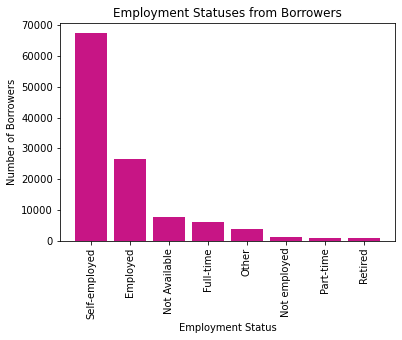

In [12]:
# Visualization of Ocupation of the borrowers
rcParams['figure.figsize'] = 6,4
x=df['EmploymentStatus'].unique()
y=df['EmploymentStatus'].value_counts()
plt.bar(x,y,color='mediumvioletred')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers')
plt.title('Employment Statuses from Borrowers')
plt.show()

We can observe how self employed and employed have higher counts of loans than the other employments

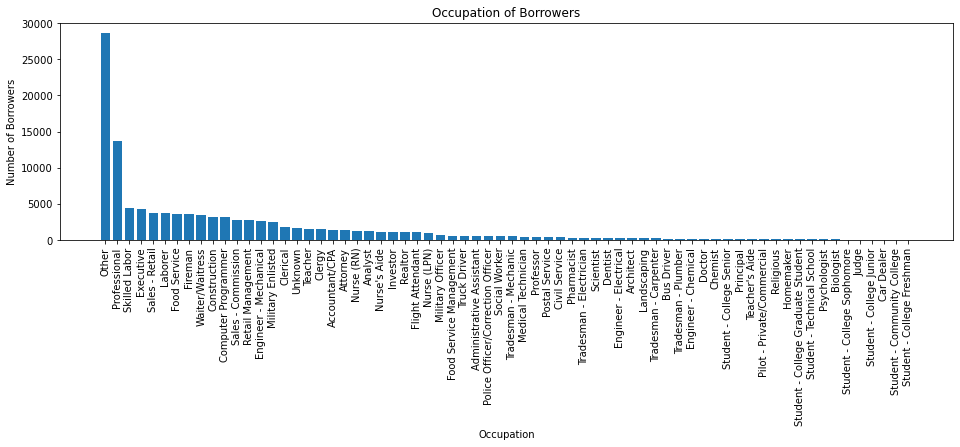

In [13]:
# Visualization of employment status
rcParams['figure.figsize'] = 16,4
x=df['Occupation'].unique()
y=df['Occupation'].value_counts()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Number of Borrowers')
plt.title('Occupation of Borrowers')
plt.show()

Professional borrowers seem to also be provided of more loans

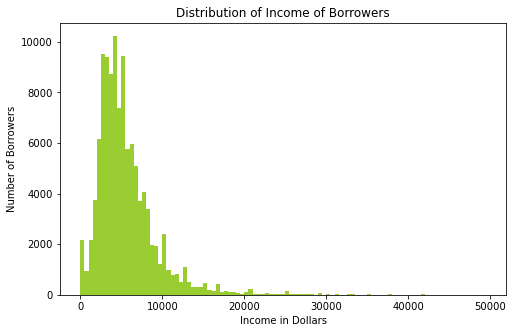

In [14]:
# We can also see the distribution of the incomes
plt.figure(figsize=[8, 5])
binsize = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=binsize, color='yellowgreen')
plt.xlabel('Income in Dollars')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Income of Borrowers');

The income distributin is skewed to the right. this is expected since most income values are bellow 100K as expected. Having a peak around 50K as most people have.

Text(0.5, 1.0, 'Number of Loans by State')

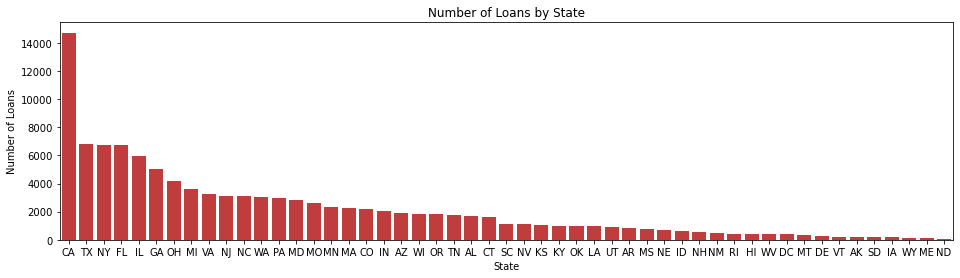

In [15]:
# Number of loans by State
default_color = sb.color_palette()[3]
sb.countplot(data=df, x='BorrowerState',color = default_color, order=df['BorrowerState'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by State')

The state of California seems to have more borrowers however this might not be correct due to population density. At this point doesnt seem logic to continue with the states distribution without a way to standarize the data

Text(0.5, 1.0, 'Number of Loans per Year')

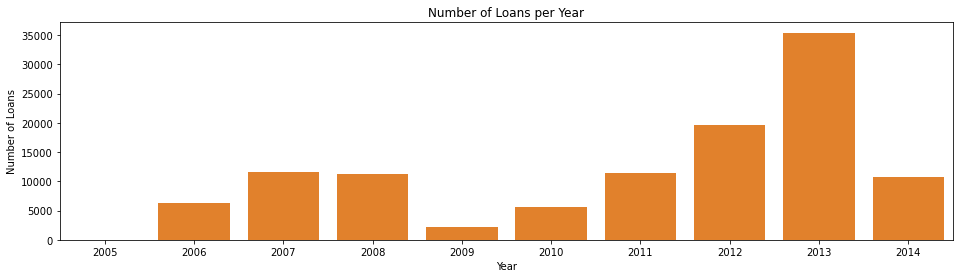

In [41]:
# Number of loans by year
default_color = sb.color_palette()[1]
sb.countplot(data=df, x='Year',color = default_color)
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Year')

Text(0.5, 1.0, 'Number of Loans per Month')

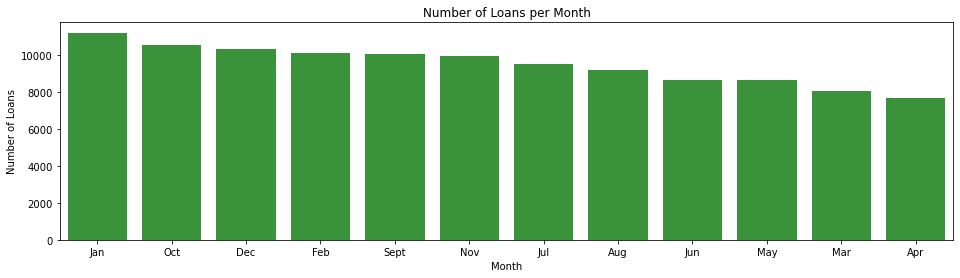

In [17]:
# Number of loans by month
default_color = sb.color_palette()[2]
sb.countplot(data=df, x='Month',color = default_color, order=df['Month'].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Month')

For most months the number of loans seems to be similar. However we see March and April as slower motnhs.

Text(0.5, 1.0, 'Number of Loans per Term')

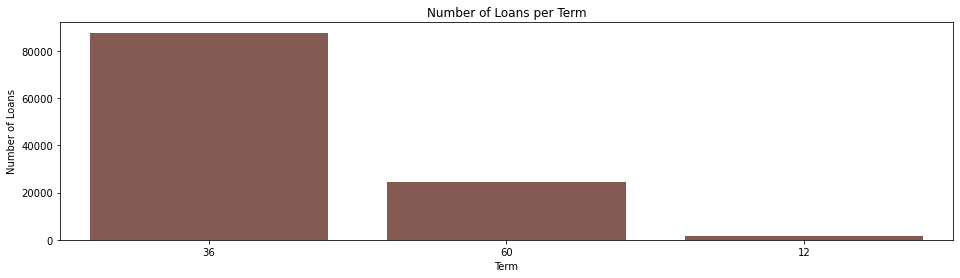

In [42]:
# We can also see what is the term distribution of the loans
sb.countplot(data = df, x = 'Term', color = sb.color_palette()[5], order=df['Term'].value_counts().index)
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Term')

The mayority of the loans have a term of 36 months followed by 60 months. Making 12 month the least common

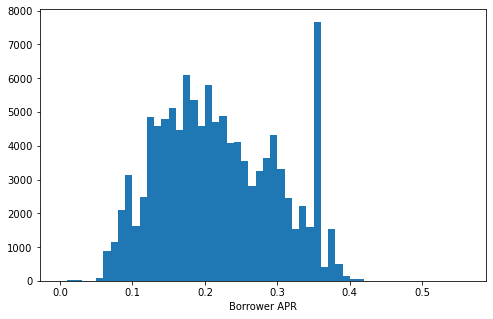

In [19]:
# After the general characteristics of the borrowers is obsevred we can continue with other data points
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR'); 

The APR seems to have a nice distribution with a high around 20% and an extra peak around 36%

Text(0.5, 1.0, 'Number of Loans per Prosper Rating')

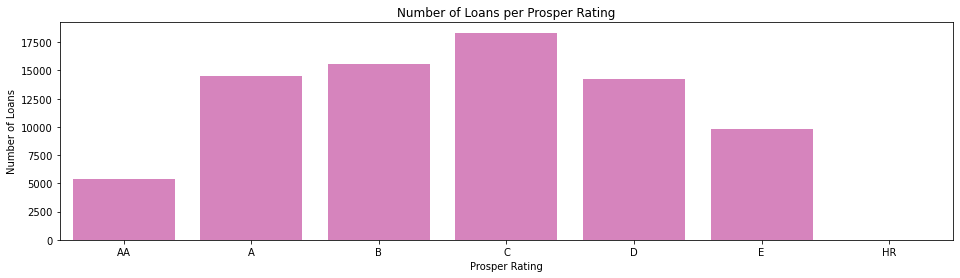

In [35]:
# distributions of Prosper Rating
ratings_order=['AA', 'A',  'B',  'C', 'D','E', 'HR']
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = sb.color_palette()[6], order=ratings_order)
plt.xlabel('Prosper Rating')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Prosper Rating')

Rating C seems to have the greates number of loans while HR/AA seem less good

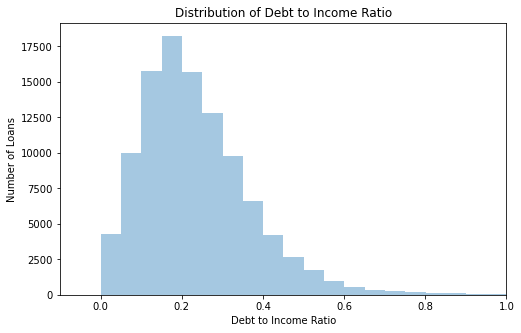

In [21]:
# Distribution of the debt to income ratio
plt.figure(figsize = [8,5])
sb.distplot(df.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Number of Loans')
plt.title('Distribution of Debt to Income Ratio');

The debt to income ratio seems to be around 20% for most borrowers.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? 

For this section we focused on the distribution and frequency of borrowers according to their employment status, occupation, income, State of recidency, time of loan request and loan term. Besides this we also dived in into the borrowers APR, prosper rating and debt to income ratio.

Interesting to observe a higer frequency of self employed than employed. These are distributed among a wide range of occupations where professionals and skilled labour take the top of the distribution. Their income is clustered towards less than 100K which is expected, providing us with a right skew of our visualization.


The distribution of APR looks multimodal. Having found small peak centered at 0.1,  0.2 and 0.3. Additionally, there is a very high peak at 0.36. Only very few loans have APR greater than 0.4.

When looking at the debt to income, it appears that most borrowers who apply for a loan have a debt to income ratio around 20%. Providing us with a right skewed graph.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In general, we couldnt obsevred any abnormal distributions. Nor was it necessary to perform extra transformations


### Bivariate Exploration

Is good to start with an overview of the relation of some of our previously studied variables

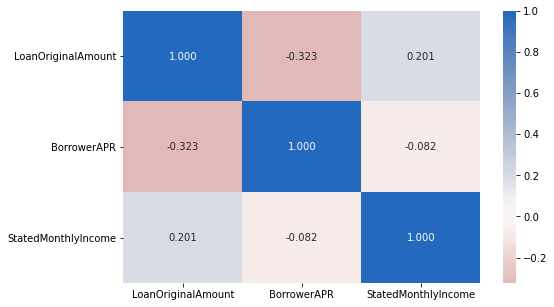

In [22]:
# Correlation plot of the first 3 variables
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

As expected there is a negative correlation between loan amount and APR. Similar, we observe a possitive correlation between Income and loan amount

C:\Users\Carla\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

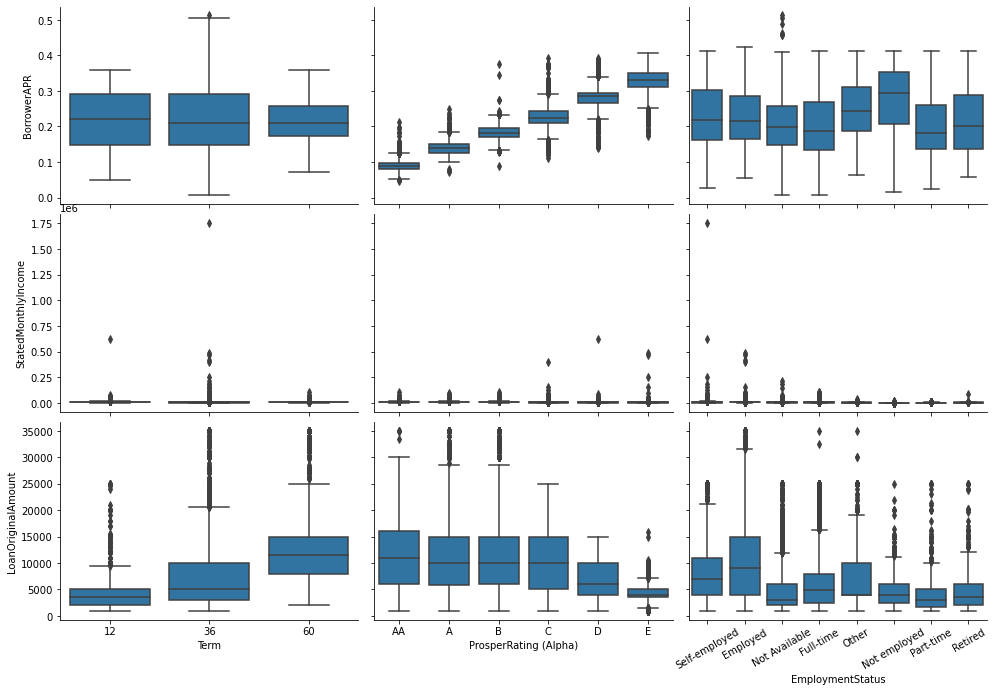

In [37]:
# Evaluation of the numerical variables against the categorical variables
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The loan amount increases with the increase of the loan term. The borrower APR changes according to the rating showing a decrese with better ratings. Employed and self-employed borrowers have a higher monthly income when compared with other employment status

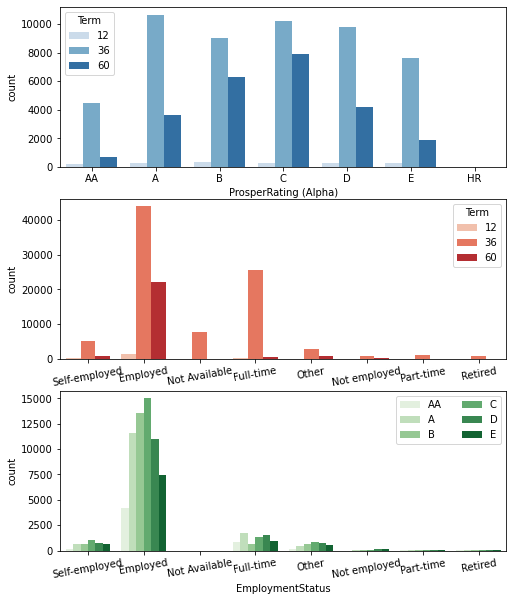

In [38]:
# Other relationships

plt.figure(figsize = [8, 10])

# Prosper rating and term
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues', order=ratings_order)

# Employment statuses and term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
plt.xticks(rotation=10)

# Prosper rating and employment status
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation=10);

In other relationships we can observe how the posper rating "C" has higher values for 36 and 60 month term in comparison with the other values. Employed people have higher long term loans than other employemnt statuses. Similar to what we have been observing employed borrowers have a higher value of posper rating "C".

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The correlation coefficient of borrower APR and loan original amount is -0.323, these two variables are negatively correlated. This leads us yo the idea that the greater the loan amount, the lower the APR will be. The loan original amount is positively correlated with the stated monthly income. This is expected since borrowers with higher monthly income have the posibility to ask and get approved for a higher value of loan.

The figure with the box grid shows that the loan amount increases with the increase of the loan term. The borrower APR changes according to the rating showing a decrese with better ratings.  Employed and self-employed borrowers have a higher monthly income and therefore, a higher loan amount when compared with other employment status.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A very good finiding is that borrowers with the best Prosper ratings have the lowest APR which makes us think of an effect realated between the prosper rating and the borrower APR. 

### Multivariate Exploration

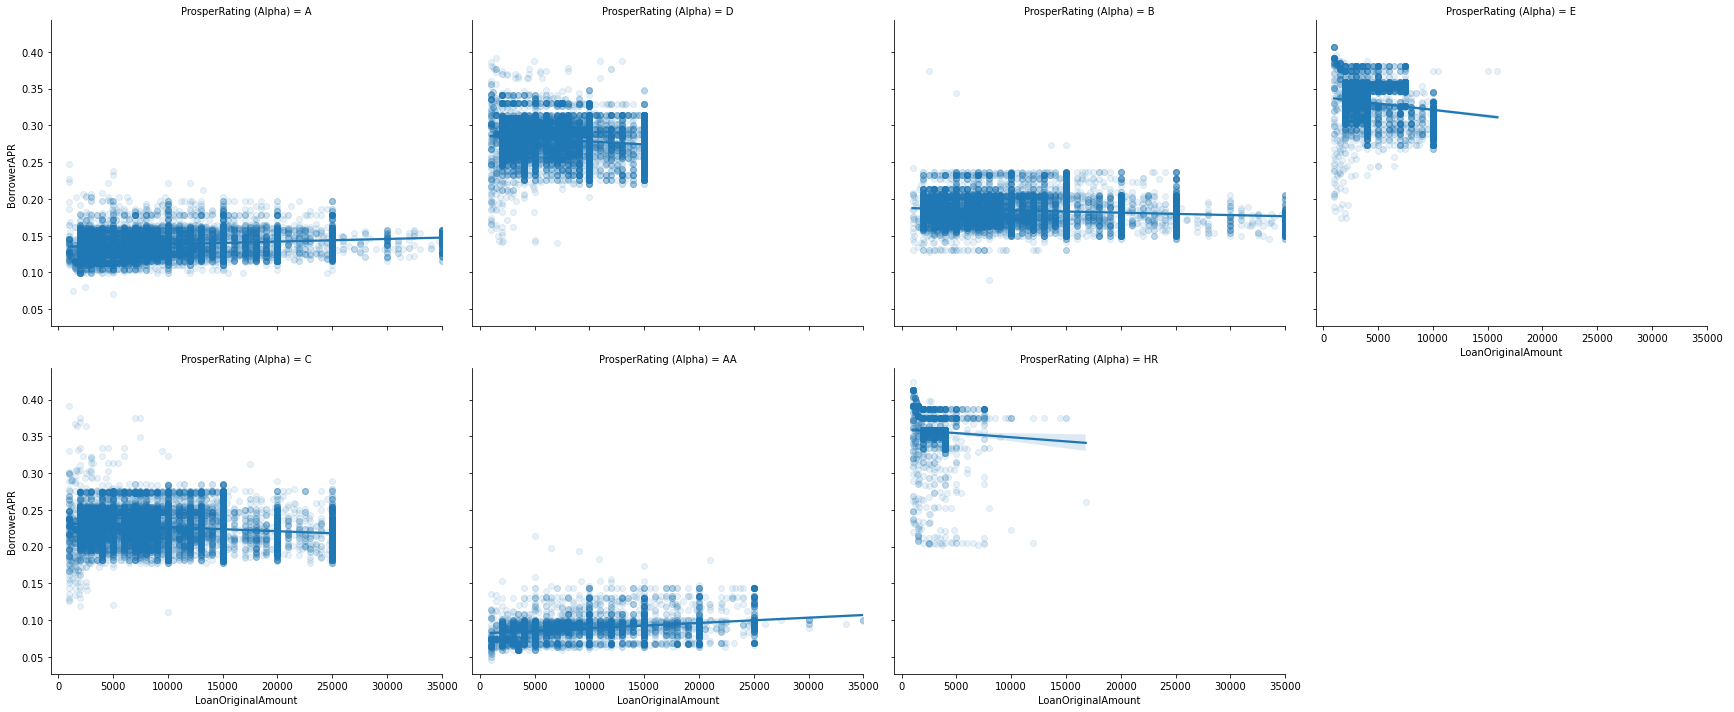

In [26]:
# To start we can do a generic Matrix to see all the previous relations
# Prosper rating in comparison with APR and loan amount
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating.

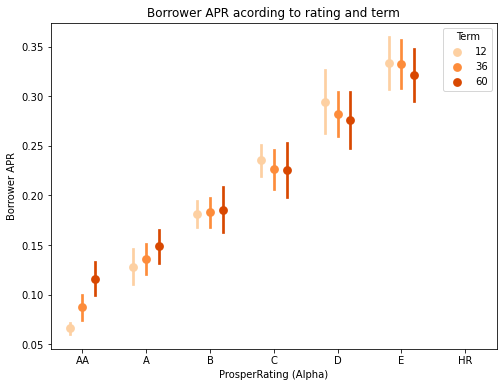

In [39]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Oranges', linestyles = '', dodge = 0.4, ci='sd', order=ratings_order)
plt.title('Borrower APR acording to rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

HR, E and D Ratings have higher APR. Is interesting to see how Rating A and AA have higher loan terms.

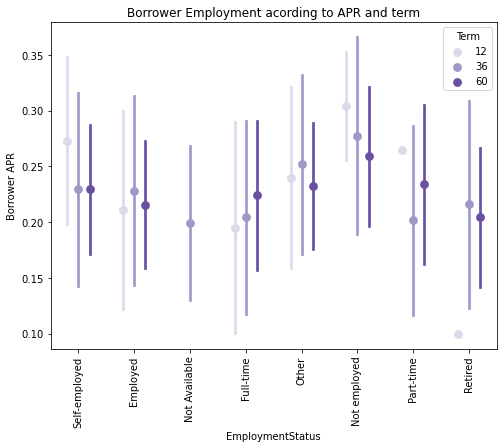

In [28]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower Employment acording to APR and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

Not employed have higher APR and lower terms. Full time employees have a better APR and similar term frquency distribution

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, we can also observe that the borrower APR appears to decrease with the increase of the borrow term for people with proper ratings of "HR" and "C". At the same time borrowers with proper ratings of "B" and "AA" will have an increase of the APR as the loan term increases.

#### Were there any interesting or surprising interactions between features?
No extra  surprising interactions. The trends seem to match what was observed within the bivariable analysis

In [29]:
df.to_csv("C:\\Users\Carla\Downloads\ProsperLoanDataFinalVersion.csv", index = False)